<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** 
 - Rubén Hernández Guevara   
 - Luis Felipe Gómez Estrada  
**Fecha:** 08 de marzo del 2021.

**Expediente** : . 
**Expediente** : IF722749.  
**Profesor:** Oscar David Jaramillo Zuluaga.
    
Enlace al repositorio: <a href="https://github.com/if722749/ProyectoConjunto_RHernandez_LFGomez">https://github.com/if722749/ProyectoConjunto_RHernandez_LFGomez</a>

# Tarea 6: Clase 10

Partiendo que se desea generar variables aleatorias para la siguiente función de densidad
$$f(x)=30(x^2-2x^3+x^4)$$
Responda los siguientes literales:
1. Usar como función que mayora a $f(x)$ a $t(x)=a \sin(\pi x)$ donde a es el máximo de la función $f(x)$ y graficarlas en una misma gráfica, para validar que en realidad si cumple la condición $t(x)\geq f(x)$.
2. Encontrar la función de densidad $g(x)$ según lo visto en clase. Reportar todos los cálculos realizados para encontrar dicha función usando Markdown (Latex).
3. Usar la función encontrada en el punto 2 y utilizar el método de la transformada inversa visto en la clase 9, para generar variables aleatorias que sigan la distribución $g(x)$. **Nota:** Recuerde que el método de la transformada inversa funciona con la distribución de probabilidad acumulada y no con su densidad. Nuevamente similar al punto anterior reportar todos los cálculos usando Markdown (Latex). 
4. Según el punto 3, generar 10000 puntos aleatorios que sigan la distribución $g(x)$ y comparar con su histograma para validar que los puntos generados siguen la distribución deseada. El resultado debe ser como sigue:

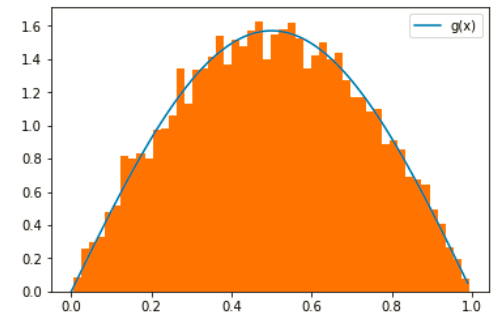


5. Genere 500 puntos aleatorios usando el método de aceptación y rechazo y las funciones $f(x)$ y $t(x)$ para validar que todos los cálculos anteriores están correctamente realizados. El resultado debe de ser como sigue:

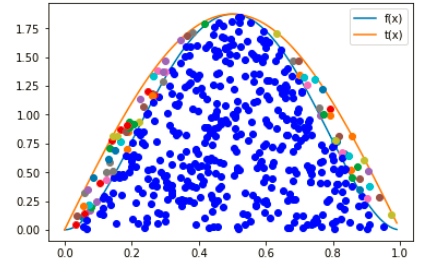

6. Comparar el porcentaje de puntos de aceptación cuando se usa $t(x)$ constante y $t(x)$ un pulso senoidal. Concluir  

7. Genere una variable aleatoria $X$ a partir de la siguiente PDF
$$f(x)=20x(1-x)^3$$ 
usando el método de aceptación y rechazo

# Luis Felipe Gómez Estrada

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize

Max_f = 1.875


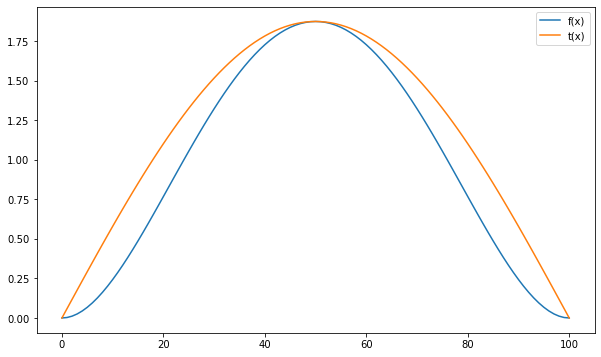

In [2]:
########### Solución 1
f = lambda x: 30*(x**2 -2*x**3 + x**4)

x = np.linspace(0,1,101)
f_x = f(x)

max_f = f(optimize.fmin(lambda x:-f(x), 0, disp=False))[0]
print(f'Max_f = {max_f}')

def t(x):
    return(max_f * np.sin(np.pi * x))

t_x = t(x)

plt.figure(figsize=(10,6))
plt.plot(f_x, label='f(x)');
plt.plot(t_x, label='t(x)');
plt.legend()
plt.show()

#### Solución 2

$$g(x)=\frac{t(x)}{c}$$
$$c = \int_{-\infty}^{\infty} t(x) \cdot dx$$

$$ \int_{a}^{b} t(x) \cdot dx$$

$$ \int_{0}^{1} t(x) \cdot dx$$

$$ \int_{0}^{1} a \sin(\pi x) \cdot dx$$

$$ \frac{a}{\pi}(-\cos(\pi x)|_{0}^{1} $$

$$ \frac{2a}{\pi} $$

$$ g(x) = \frac{a \sin(\pi x)}{\frac{2a}{\pi}} $$

$$ g(x) = \frac{ \sin(\pi x)}{\frac{2}{\pi}} $$

$$ g(x) = \frac{ \pi \sin(\pi x)}{2} $$

####  Solución 3
$$ G(x) =  \int_{0}^{x} \frac{ \pi \sin(\pi x)}{2} dx$$

$$ G(x) =  \frac{1}{2}(- \cos(\pi x)+1) $$

$$ U = \frac{1}{2}(- \cos(\pi x)+1) $$

$$ 2U = (- \cos(\pi x)+1) $$

$$ 2U-1 = - \cos(\pi x) $$

$$ -2U+1 = \cos(\pi x) $$

$$ \cos^{-1}(-2U+1) = \pi x$$

$$ \frac{\cos^{-1}(-2U+1)}{\pi} = x$$

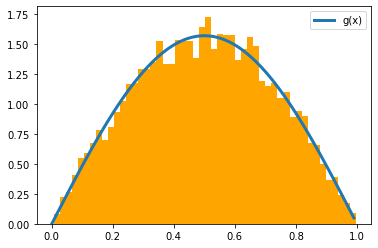

In [3]:
########### Solución 4
def g(x):
    y = (np.pi*np.sin(np.pi*x))/2 
    return y

def g_inv(u):
    x = (np.arccos(-2*u+1))/(np.pi)
    return x

def m_aleatorias(n):
    u = np.random.rand(n)
    r = np.array(list(map(lambda i: g_inv(u[i]), range(n))))
    return r

x_r = m_aleatorias(10_000)

x_ = np.arange(0,1,0.01)
y_ = g(x_)

plt.hist(x_r, bins=50, density=True, color='orange')
plt.plot(x_, y_, label='g(x)', lw=3)
plt.legend()
plt.show()

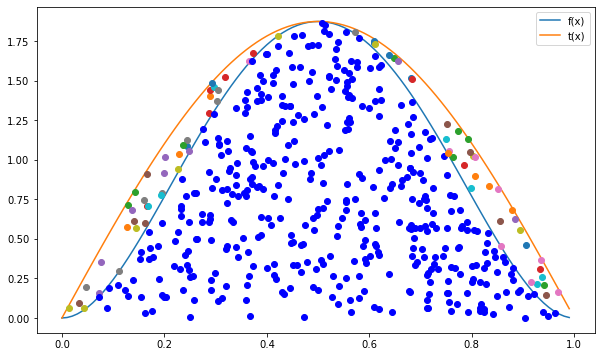

Wall time: 1.52 s


In [4]:
########### Solución 5
def Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]       
    plt.show()
    x = [R1[i] for i in range(len(R1)) if condition[i]]
    return x

N = 500
R2 = np.random.rand(N)
R1 = m_aleatorias(N)
x = np.arange(0,1,0.01)

plt.figure(figsize=(10,6))
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()
generated_vals = Acep_rechazo(R2, R1, f, t)

plt.show()

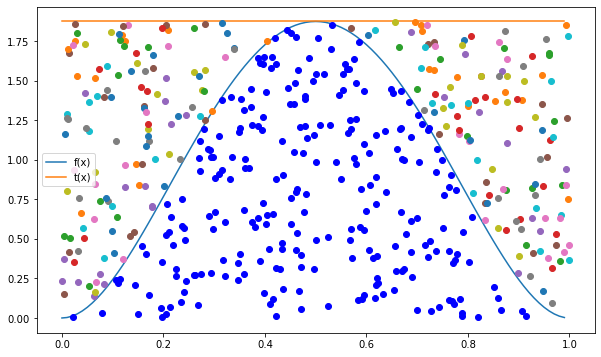

Wall time: 2.25 s


In [5]:
########### Solución 6
t_c = lambda x: max_f * np.ones(len(x))
N = 500

R2 = np.random.rand(N)
R1 = np.random.rand(N)

plt.figure(figsize=(10, 6))
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t_c(x),label='t(x)')
plt.legend()

generated_vals_c = Acep_rechazo(R2, R1, f, t_c)
plt.show()

In [6]:
print(f'{len(generated_vals)*100/500:.4f}% de valores aceptados con t(x) senoidal')
print(f'{len(generated_vals_c)*100/500:.4f}% de valores aceptados con t(x) constante')

84.6000% de valores aceptados con t(x) senoidal
50.0000% de valores aceptados con t(x) constante


Por lo que la función t(x) con un pulso senoidal es mejor para generar variables dado que t(x) constante rechaza casi la mitad de los valores, y tendríamos que estar generando casi dos veces la cantidad de variables que queremos utilizar.

El máximo de f es: 2.109375


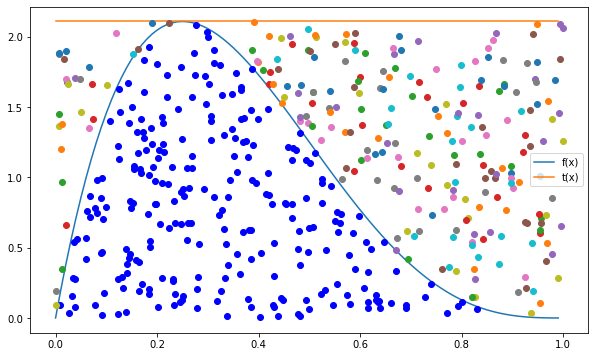

In [7]:
########### Solución 7
f = lambda x:20*x*(1-x)**3
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
t = lambda x: max_f*np.ones(len(x))

x = np.arange(0,1,0.01)
print(f'El máximo de f es: {max_f[0]}')

N = 500
R2 = np.random.rand(N)
R1 = np.random.rand(N)

plt.figure(figsize=(10, 6))
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

random_variables = Acep_rechazo(R2,R1,f,t)

# Rubén Hernández Guevara

#### 1. Usar como función que mayora a  𝑓(𝑥)  a  𝑡(𝑥)=𝑎sin(𝜋𝑥)  donde a es el máximo de la función  𝑓(𝑥)  y graficarlas en una misma gráfica, para validar que en realidad si cumple la condición  𝑡(𝑥)≥𝑓(𝑥) .

El maximo de fx, es:  [1.875]


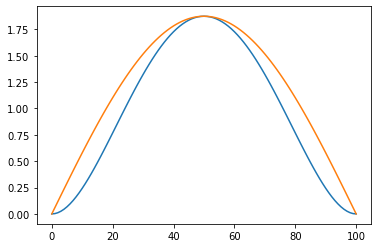

In [8]:
def f(x):
    return 30*(x**2 -2*x**3 + x**4)

c = f(optimize.fmin(lambda x:-f(x), 0, disp=False))
x = np.arange(0, 1, 0.01)

def t(x):
    return(c*np.sin(np.pi*x))

x = np.linspace(0,1,101)
f_x = list(map(f, x))

t_x = list(map(t, x))

plt.plot(f_x);
plt.plot(t_x);
print('El maximo de fx, es: ', c)

> Se cumple que $$t(x) ≥ f(x)$$

#### 2. Encontrar la función de densidad  𝑔(𝑥)  según lo visto en clase. Reportar todos los cálculos realizados para encontrar dicha función usando Markdown (Latex)

1. Definir "c", $t(x)$ no es densidad de probabilidad 

$$c = \int_{-\infty}^{\infty} t(x) \cdot dx$$

2. Igualar 

$$g(x) = \frac{t(x)}{c}$$

3. Integrar y evaluar

$$\int_{0}^{1} a \sin(\pi x) \cdot dx$$


$$g(x) = \frac{ \pi \sin(\pi x)}{2}$$

#### 3. Usar la función encontrada en el punto 2 y utilizar el método de la transformada inversa visto en la clase 9, para generar variables aleatorias que sigan la distribución  𝑔(𝑥) . Nota: Recuerde que el método de la transformada inversa funciona con la distribución de probabilidad acumulada y no con su densidad. Nuevamente similar al punto anterior reportar todos los cálculos usando Markdown (Latex).

1. Integrar $g(x)$

$$ g(x) =  \int_{0}^{x} \frac{ \pi \sin(\pi x)}{2}, = \frac{1}{2}(- \cos(\pi x)+1) dx$$

2. Igualar U y luego despejar x

$$ U = \frac{1}{2}(- \cos(\pi x)+1) $$

$$ \frac{\cos^{-1}(-2U+1)}{\pi} = x$$

#### 4. Según el punto 3, generar 10000 puntos aleatorios que sigan la distribución  𝑔(𝑥)  y comparar con su histograma para validar que los puntos generados siguen la distribución deseada. El resultado debe ser como sigue:

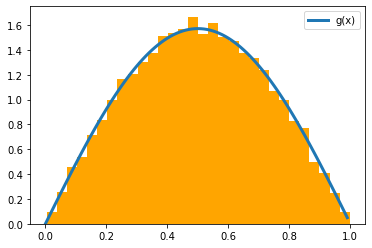

In [9]:
x = np.arange(0, 1, 0.01)

f = lambda x:30*(x**2-2*x**3+x**4)
t = lambda x: c*np.sin(np.pi*x)
g = lambda x: np.pi/2*np.sin(np.pi*x)

N = 10000
R2 = np.random.rand(N)
u = np.random.uniform(0, 1, N)

R1 =  (np.arccos(-2*u+1))/(np.pi) 

plt.hist(R1, 30, density = True, color = 'orange')
plt.plot(x, g(x), label = 'g(x)', lw = 3)
plt.legend()
plt.show()

#### 5. Genere 500 puntos aleatorios usando el método de aceptación y rechazo y las funciones  𝑓(𝑥)  y  𝑡(𝑥)  para validar que todos los cálculos anteriores están correctamente realizados. El resultado debe de ser como sigue:

In [10]:
def MAR(R2:'Variable distribuida U~U(0,1)',
                 R1:'Variable distribuida como g(x)',
                 f:'función objetivo',
                 t:'función > f'):
    f_x = f(R1)
    t_x = t(R1)
    condition = np.multiply(R2,t_x)<=f_x
    [plt.plot(R1[i],R2[i]*t_x[i],'*b') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]
    elem = [x for x in range(len(R1)) if condition[x]]
    return elem            
    plt.show()

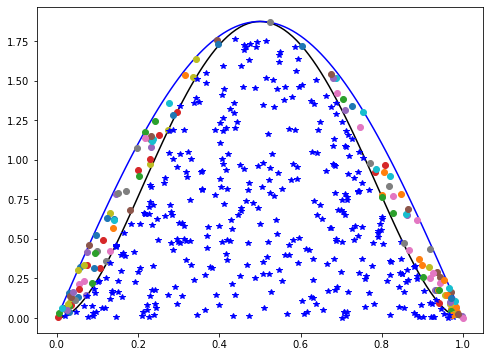

In [11]:
N = 500

x = np.arange(0,1,0.01)

plt.figure(figsize=(8, 6))
plt.plot(x,f(x),'k')
plt.plot(x,t(x),'b')
R2 = np.random.rand(N)
R1 = np.random.rand(N)

VA1 = MAR(R2,R1,f,t)

#### 6. Comparar el porcentaje de puntos de aceptación cuando se usa  𝑡(𝑥)  constante y  𝑡(𝑥)  un pulso senoidal. Concluir

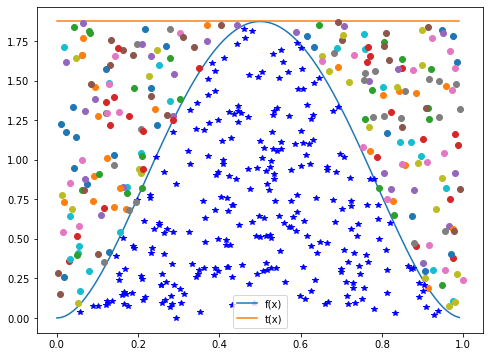

In [12]:
max_f = f(optimize.fmin(lambda x:-f(x), 0, disp=False))[0]

t_c = lambda x: max_f * np.ones(len(x))
N = 500

R2 = np.random.rand(N)
R1 = np.random.rand(N)

plt.figure(figsize=(8, 6))
plt.plot(x, f(x),label='f(x)')
plt.plot(x, t_c(x),label='t(x)')
plt.legend()

VA2 = MAR(R2, R1, f, t_c)
plt.show()

In [13]:
print(f'{len(VA1)/500*100}% de valores aceptados con t(x) senoidal')
print(f'{len(VA2)/500*100}% de valores aceptados con t(x) constante')

73.4% de valores aceptados con t(x) senoidal
53.0% de valores aceptados con t(x) constante


#### 7. 7. Genere una variable aleatoria $X$ a partir de la siguiente PDF
$$f(x)=20x(1-x)^3$$ 
#### usando el método de aceptación y rechazo

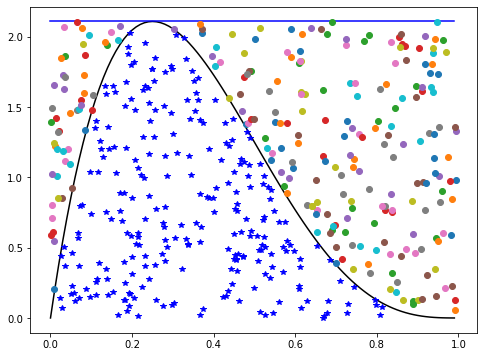

In [14]:
def f(x):
    return 20*x*(1-x)**3

N = 500

x = np.arange(0, 1, 0.01)

t = lambda x: np.max(f(x)) * np.ones([len(x)])

plt.figure(figsize=(8, 6))
plt.plot(x,f(x),'k')
plt.plot(x,t(x),'b')
R2 = np.random.rand(N)
R1 = np.random.rand(N)

MAR(R2,R1,f,t)
plt.show()

Enlace al repositorio: <a href="https://github.com/if722749/ProyectoConjunto_RHernandez_LFGomez">https://github.com/if722749/ProyectoConjunto_RHernandez_LFGomez</a>